In [4]:
#加载数据集并进行数据处理
import pandas as pd
import numpy as np
import os
from collections import Counter
from sklearn.datasets import load_boston
from scipy.stats import stats

# 文件路径要求跟代码块在同意路径下，若使用绝对地址则更改origin_path
origin_path = os.getcwd()                # 根目录
source_path = os.path.join(origin_path,"S_GH_0.xlsx")
save_path_Kinship_m50 = os.path.join(origin_path,"Kinship_m50.xlsx" )

In [2]:
df1 = pd.read_excel(source_path)

In [3]:
df1

,Pp,Rp,Tb,Tp,Pp最大磁场值,Rp最大磁场值,Tb最大磁场值,Tp最大磁场值,Pp最大电流矢量幅值,Rp最大电流矢量幅值,...,Rp总电流矢量幅值,Tb总电流矢量幅值,Tp总电流矢量幅值,Pp总电流矢量方向,Rp总电流矢量方向,Tb总电流矢量方向,Tp总电流矢量方向,姓名,性别,年龄
0,0.235,0.399,0.567,0.644,0.924248,27.093340,1.345278,6.323844,3.097359,21.332622,...,652.341253,53.489668,218.093599,65,30,23,57,DN001朱颖杰,男,38
1,0.236,0.398,0.586,0.683,0.661667,8.334574,0.591779,7.781063,1.730351,13.194764,...,273.805130,34.082395,384.876911,58,102,44,43,DN002李轩,男,24
2,0.260,0.399,0.605,0.684,0.178841,16.658529,0.306708,3.513174,0.559083,8.316939,...,525.008083,4.475806,139.867405,50,21,36,17,DN003王小小,女,39
3,0.271,0.400,0.500,0.651,0.121324,24.380432,0.543420,5.137691,0.264820,18.304380,...,657.116917,61.779582,195.110611,41,23,-152,26,DN004黄晓妮,女,32
4,0.216,0.399,0.512,0.618,0.936661,73.957121,1.357932,7.836732,2.247919,17.751558,...,1486.491863,40.653442,268.424722,52,22,-35,53,DN005陈泇霖,男,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.233,0.400,0.559,0.638,1.061349,23.852166,1.135880,3.551287,0.808867,15.850733,...,687.106771,42.454081,123.506127,55,71,-6,28,DN367袁华梁,男,51
362,0.244,0.400,0.561,0.651,1.537962,30.151008,0.880035,7.133913,1.361606,15.369898,...,985.022923,29.788824,300.598306,33,50,-3,30,DN368王继军,男,57
363,0.233,0.409,0.578,0.678,1.691535,23.258047,0.811506,7.455830,1.122758,23.840342,...,674.144618,20.258341,317.505096,54,20,20,26,DN369曾灿,男,28
364,0.273,0.400,0.604,0.672,0.564670,36.138169,0.171873,2.974759,0.703236,33.708936,...,813.825468,2.810635,117.927896,43,13,-93,-8,DN370詹晓东,女,40


In [104]:
df1_Kinship_i50 = pd.DataFrame(columns=df1.columns)
for i in range(len(df1['Kinship'])):
    if (df1['Kinship'][i] <= 50):
        if (df1['Sale Price'][i]<40000) and ((df1['Sale Price'][i]-df1['StakedOnGHST'][i])>0):
            df1_Kinship_i50 = df1_Kinship_i50.append([dict(df1.iloc[i])],ignore_index=True)

In [108]:
len(df1_Kinship_i50)/len(df1)

0.04594232059020791

In [102]:
Kinship_m50 = []
df1_Kinship_m50 = pd.DataFrame(columns=df1.columns)
for i in range(len(df1['Kinship'])):
    if (df1['Kinship'][i] > 50):
        if (df1['Sale Price'][i]<40000) and ((df1['Sale Price'][i]-df1['StakedOnGHST'][i])>0):
            df1_Kinship_m50 = df1_Kinship_m50.append([dict(df1.iloc[i])],ignore_index=True)

In [87]:
df1_Kinship_m50

,Unnamed: 0,Unnamed: 0.1,Listing,Gotchi,Name,Date,Buyer,Seller,Sale Price,BaseRarityScore,ModifiedRarityScore,Kinship,Experience,Wearables,Collateral,StakedAmount,StakedType,StakedOnGHST,Sale-GHST
0,0,0,216439,17002,MYTHICALEYE-495BRS/401KIN,2022--04--16 14:43:02,0xf0a960597f499fbf04a182b1ef98ef5d10c0424a,0xd430f0850fc568de4d460b63cfda9b35383dc4df,722.0,495,495,401,80,0,0x1d2a0e5ec8e5bbdca5cb219e649b565d8e5c3360,0.080030,amAAVE,31.932045,690.067955
1,1,1,216447,22152,quadrate,2022--04--16 12:52:38,0x4cb433e0d88e6c98e337f19d32a52dfdb9153b00,0xd430f0850fc568de4d460b63cfda9b35383dc4df,750.0,510,510,348,300,0,0x27f8d03b3a2196956ed754badc28d73be8830a6e,25.405847,amDAI,25.405847,724.594153
2,2,2,216419,4784,trabucco,2022--04--16 11:31:19,0x9f23007d231f80be8e8946139f06b9feaaac4944,0xc99df6b7a5130dce61ba98614a2457daa8d92d1c,800.0,502,502,485,335,1,0x20d3922b4a1a8560e1ac99fba4fade0c849e2142,0.017570,maWETH,12.843670,787.156330
3,3,3,216381,23456,Egoist,2022--04--16 11:22:41,0xd6c515bd1cc5111a6f689634bc056a64655b1cc7,0x0914a5b426229bf17584bcc2b6e2ca1993bb2ef4,715.0,455,455,342,110,0,0x1a13f4ca1d028320a707d99520abfefca3998b7f,25.408860,amUSDC,25.408860,689.591140
4,4,4,216410,4326,$DAI 4 U,2022--04--16 10:42:49,0x82131e86d080312e13605aada6538a94df5b41a5,0xc99df6b7a5130dce61ba98614a2457daa8d92d1c,750.0,487,487,466,330,1,0xe0b22e0037b130a9f56bbb537684e6fa18192341,25.100000,maDAI,25.100000,724.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,3013,3995,144587,20063,BRS-520,2021--10--26 15:20:11,0x40cf6bb888ca670e20139b1caa0ba0996f65371c,0x7f433b38dd933cea19506d1fc26369b326d55cec,528.0,513,529,462,485,3,0x27f8d03b3a2196956ed754badc28d73be8830a6e,25.467971,amDAI,25.467971,502.532029
2841,3014,3996,144716,24416,Loweye Lucas,2021--10--26 15:19:29,0x40cf6bb888ca670e20139b1caa0ba0996f65371c,0x03b16ab6e23bdbeeab719d8e4c49d63674876253,469.0,505,513,469,505,3,0x1a13f4ca1d028320a707d99520abfefca3998b7f,25.490490,amUSDC,25.490490,443.509510
2842,3015,3997,144954,14769,Don Lito,2021--10--26 14:49:36,0x40cf6bb888ca670e20139b1caa0ba0996f65371c,0x2a254c18f8e1794b05bea298ae27126df160b9e0,550.0,505,521,483,505,3,0x27f8d03b3a2196956ed754badc28d73be8830a6e,25.505518,amDAI,25.505518,524.494482
2843,3016,3998,144996,19390,Steal Me 524 Hi Kin/xp,2021--10--26 14:42:04,0x40cf6bb888ca670e20139b1caa0ba0996f65371c,0x96fe6681b5b8be0c5d6e8eb690adec7ecb0831c9,699.0,525,547,494,475,5,0x60d55f02a771d515e077c9c2403a1ef324885cec,25.971630,amUSDT,25.971630,673.028370


In [60]:
df1_Kinship_m50.to_excel(save_path_Kinship_m50,index = False)

In [61]:
df1_Kinship_m50['Sale Price']

0       722.0
1       750.0
2       800.0
3       715.0
4       750.0
        ...  
2840    528.0
2841    469.0
2842    550.0
2843    699.0
2844    450.0
Name: Sale Price, Length: 2845, dtype: float64

In [345]:
max(df1_Kinship_m50['Sale Price'])

12000.0

In [121]:
feature_names = ['ModifiedRarityScore','Sale Price','Experience','Kinship','StakedOnGHST']
features = df1_Kinship_i50[feature_names]#提取特征集
df1_Kinship_i50['Sale-GHST'] = df1_Kinship_i50['Sale Price']-df1_Kinship_i50['StakedOnGHST']#提取标签列
label = df1_Kinship_i50['Sale-GHST']

boston = pd.concat([features,label],axis =1)#合并特征集和标签列
print(boston)

    ModifiedRarityScore  Sale Price Experience Kinship  StakedOnGHST  \
0                   446       705.0          0      47     10.000123   
1                   503       715.0         90      49     25.489585   
2                   536      1000.0          0      18     25.037612   
3                   482       999.0        650      25    150.000000   
4                   485       750.0          0      47     50.517643   
..                  ...         ...        ...     ...           ...   
132                 477       600.0         90       3     12.000000   
133                 473       400.0          0      43     62.884390   
134                 488       392.0         10       3     25.225476   
135                 534      1300.0        125      12    217.720000   
136                 478       450.0         30      26     25.029700   

       Sale-GHST  
0     694.999877  
1     689.510415  
2     974.962388  
3     849.000000  
4     699.482357  
..           ...  
13

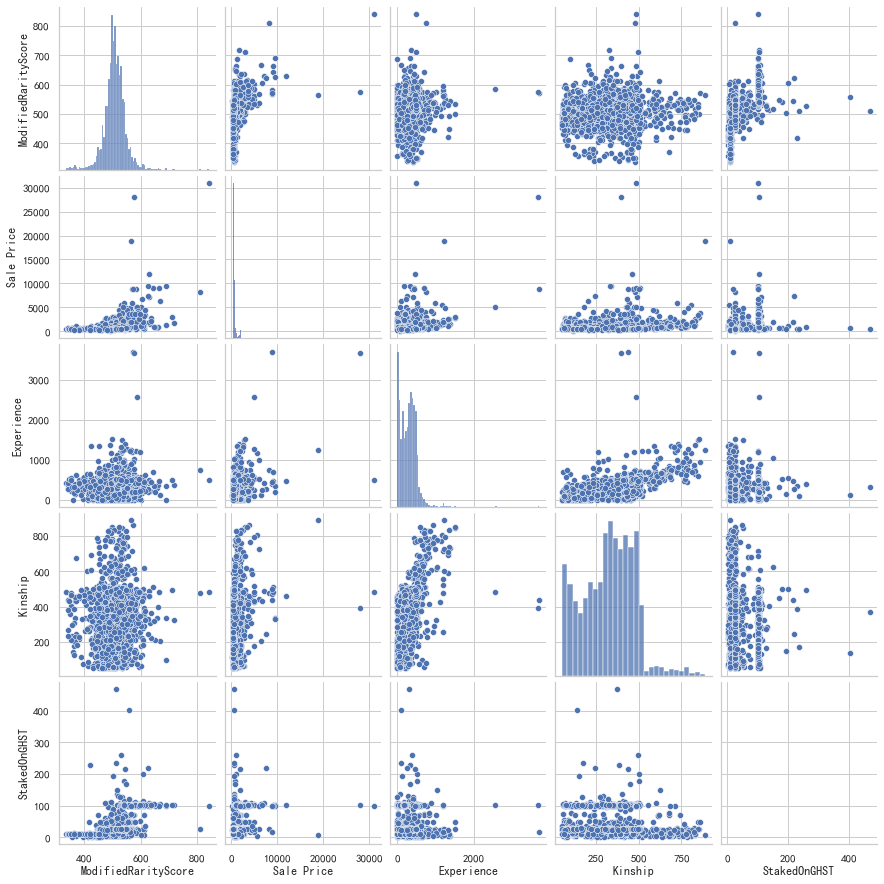

In [70]:
#绘制散点矩阵图
import matplotlib.pyplot as plt
import seaborn as seb
seb.pairplot(data = boston,vars = ['ModifiedRarityScore','Sale Price','Experience','Kinship','StakedOnGHST'])
plt.savefig('scatter fig.png',dpi=500,hue="species")#绘图结果存到本地

In [76]:
min(boston['Kinship'])

51

In [122]:
boston['Sale_Kinship'] = boston['Sale-GHST']/(boston['Kinship']-50)
boston['Sale_Kinship'].mean()

ZeroDivisionError: float division by zero

In [94]:
Sale_kin_list = sorted(list(boston['Sale_Kinship']),reverse=True)

In [98]:
len(Sale_kin_list)

2845

In [99]:
sum(Sale_kin_list[0:int(len(Sale_kin_list)*0.2)])/sum(Sale_kin_list)

0.7836279419252461

In [180]:
len(boston['Sale_Kinship'])-len(Sale_kin)

84

In [27]:
boston['Sale_Kinship']

0       1.96601
1       2.43152
2       1.80955
3       2.36161
4       1.74255
         ...   
2840    1.21974
2841     1.0585
2842     1.2113
2843    1.51583
2844    1.18159
Name: Sale_Kinship, Length: 2845, dtype: object

In [307]:
Sale_ki_list = []
for i in (boston['Sale_Kinship']):
    if i<0:
        Sale_ki_list.append(i)

In [308]:
len(Sale_ki_list)

0

In [179]:
Sale_kin = pd.DataFrame(Sale_ki_list,columns=['Sale_Kinship']) 

In [317]:
min((boston['Kinship']-50))

1

In [329]:
list(x for x in range(5))

[0, 1, 2, 3, 4]

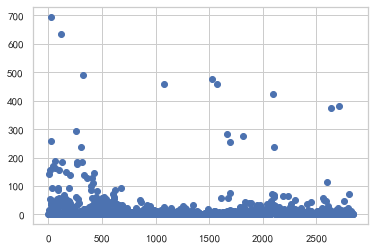

In [330]:
plt.scatter([x for x in range(len(boston['Sale_Kinship']))],boston['Sale_Kinship']) #绘制y的曲线 Sale_ki_list
plt.show()

In [355]:
print(boston.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ModifiedRarityScore  2842 non-null   object 
 1   Experience           2842 non-null   object 
 2   Kinship              2842 non-null   object 
 3   Sale-GHST            2842 non-null   float64
 4   Sale_Kinship         2842 non-null   object 
dtypes: float64(1), object(4)
memory usage: 111.1+ KB
None


In [81]:
StakedOnGHST_None = pd.DataFrame(columns=df1.columns)
for i in range(len(df1)):
    if (df1['Kinship'][i]<50):
        StakedOnGHST_None = StakedOnGHST_None.append([dict(df1.iloc[i])],ignore_index=True)

In [114]:
sorted(list(boston['Sale_Kinship']))

[0.27176119158878503,
 0.6957142857142857,
 0.8046618034967308,
 0.8093343765903307,
 0.8220221538461538,
 0.8258156111111111,
 0.8451242708803612,
 0.8533325117345878,
 0.875,
 0.8819248226950354,
 0.8922716326820731,
 0.8950404556962025,
 0.8974967461460491,
 0.9054581281464531,
 0.9068003301886792,
 0.9079178398058252,
 0.9104837741120936,
 0.9109811639344263,
 0.9164596239266972,
 0.917813039318478,
 0.9298750287157813,
 0.9328572166270076,
 0.9330102081339713,
 0.9396723569337134,
 0.9402979117647058,
 0.9529273500958216,
 0.9589912194866533,
 0.9609816892452903,
 0.962557694235589,
 0.9657597820804641,
 0.9694321333333334,
 0.9709309084804906,
 0.9734406108519863,
 0.9777120482673268,
 0.9876668338085911,
 1.0022036904761904,
 1.0026624376610649,
 1.0026693498659518,
 1.0059128605260912,
 1.0109183961748633,
 1.0202771301775149,
 1.0225771699589297,
 1.027767036111111,
 1.0280605089058525,
 1.0283269004376367,
 1.0340011100217865,
 1.0370587275642988,
 1.0379781359649123,
 1.0410

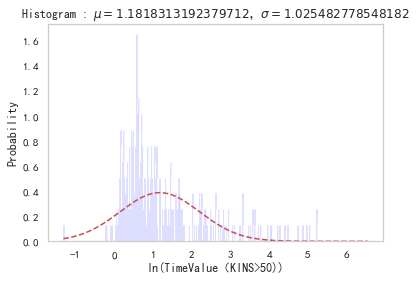

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import matplotlib.mlab as mlab
import seaborn as sns
#%matplotlib inline
sns.set(context='notebook',font='simhei',style='whitegrid')#设置风格尺度和显示中文
 
import warnings
warnings.filterwarnings('ignore')#不发出警告
#直方图
from scipy.stats import norm#使用直方图和最大似然高斯分布拟合绘制分布
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#rs=np.random.RandomState(50)#设置随机数种子
#s=pd.Series(rs.randn(100)*100)
s=np.log(list(boston['Sale_Kinship']))

mu =np.mean(s) #计算均值 
sigma =np.std(s) 
num_bins = len(s) #直方图柱子的数量 
n, bins, patches = plt.hist(s, num_bins, density=1, facecolor='blue', alpha=0.55) 
#直方图函数，x为x轴的值，normed=1表示为概率密度，即和为一，绿色方块，色深参数0.5.返回n个概率，直方块左边线的x值，及各个方块对象 
y = norm.pdf(bins, mu, sigma)#拟合一条最佳正态分布曲线y
#str='Histogram : $\mu=5.8433$'+str(mu)+',$\sigma=0.8253$';
plt.grid(False)
plt.plot(bins, y, 'r--') #绘制y的曲线 
plt.xlabel('ln(TimeValue（KINS>50))') #绘制x轴 
plt.ylabel('Probability') #绘制y轴 
plt.title(r'Histogram : $\mu={}$，$\sigma={}$'.format(mu,sigma))#在题目中显示mu与sigma

#plt.subplots_adjust(left=0.15)#左边距 
plt.savefig('Probability fig.png',dpi=1000,bbox_inches = 'tight')#绘图结果存到本地
plt.show()

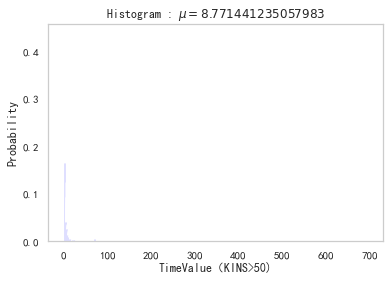

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import matplotlib.mlab as mlab
import seaborn as sns
#%matplotlib inline
sns.set(context='notebook',font='simhei',style='whitegrid')#设置风格尺度和显示中文
 
import warnings
warnings.filterwarnings('ignore')#不发出警告
#直方图
from scipy.stats import norm#使用直方图和最大似然高斯分布拟合绘制分布
#rs=np.random.RandomState(50)#设置随机数种子
#s=pd.Series(rs.randn(100)*100)
s=(list(boston['Sale_Kinship']))

mu =np.mean(s) #计算均值 
sigma =np.std(s) 
num_bins = len(s) #直方图柱子的数量 
n, bins, patches = plt.hist(s, num_bins, density=1, facecolor='blue', alpha=0.55) 
#直方图函数，x为x轴的值，normed=1表示为概率密度，即和为一，绿色方块，色深参数0.5.返回n个概率，直方块左边线的x值，及各个方块对象 
#y = norm.pdf(bins, mu, sigma)#拟合一条最佳正态分布曲线y
#str='Histogram : $\mu=5.8433$'+str(mu)+',$\sigma=0.8253$';
plt.grid(False)
#plt.plot(bins, y, 'r--') #绘制y的曲线 
plt.xlabel('TimeValue（KINS>50)') #绘制x轴 
plt.ylabel('Probability') #绘制y轴 
plt.title(r'Histogram : $\mu={}$'.format(mu))#在题目中显示mu与sigma

#plt.subplots_adjust(left=0.15)#左边距 
plt.savefig('Probability fig.png',dpi=1000,bbox_inches = 'tight')#绘图结果存到本地
plt.show()

In [320]:
'Sale Price','StakedOnGHST'

8.719186252328276

In [7]:
r,p_value = stats.pearsonr(df1['Kinship'],df1['Sale-GHST'])#计算相关系数和对应的显著性
print('Kinship与Sale-GHST相关系数为{:.3f},p值为{:.5f}'.format(r,p_value))#相关系数保留3位小数，p值保留5位小数

Kinship与Sale-GHST相关系数为0.161,p值为0.00000


In [1]:
r,p_value = stats.pearsonr(boston['ModifiedRarityScore'],boston['Sale Price'])#计算相关系数和对应的显著性
print('ModifiedRarityScore与Sale Price相关系数为{:.3f},p值为{:.5f}'.format(r,p_value))#相关系数保留3位小数，p值保留5位小数
r,p_value = stats.pearsonr(boston['StakedOnGHST'],boston['Sale Price'])#计算相关系数和对应的显著性
print('StakedOnGHST与Sale Price相关系数为{:.3f},p值为{:.5f}'.format(r,p_value))#相关系数保留3位小数，p值保留5位小数
r,p_value = stats.pearsonr(boston['Experience'],boston['Sale Price'])#计算相关系数和对应的显著性
print('Experience与Sale Price相关系数为{:.3f},p值为{:.5f}'.format(r,p_value))#相关系数保留3位小数，p值保留5位小数
r,p_value = stats.pearsonr(boston['Kinship'],boston['Sale Price'])#计算相关系数和对应的显著性
print('Kinship与Sale Price相关系数为{:.3f},p值为{:.5f}'.format(r,p_value))#相关系数保留3位小数，p值保留5位小数
r,p_value = stats.pearsonr(boston['StakedOnGHST'],boston['Sale Price'])#计算相关系数和对应的显著性
print('StakedOnGHST与Sale Price相关系数为{:.3f},p值为{:.5f}'.format(r,p_value))#相关系数保留3位小数，p值保留5位小数
r,p_value = stats.pearsonr(boston['Experience'],boston['Kinship'])#计算相关系数和对应的显著性
print('Experience与Kinship相关系数为{:.3f},p值为{:.5f}'.format(r,p_value))#相关系数保留3位小数，p值保留5位小数

NameError: name 'stats' is not defined

<AxesSubplot:>

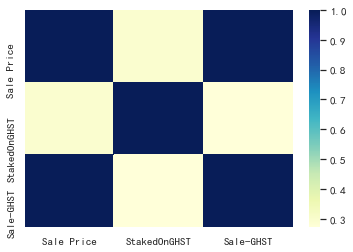

In [15]:
#绘制相关系数的热力图
import seaborn as seb
r_pearson = boston.corr()
#seb.heatmap(data = r_pearson)
seb.heatmap(data = r_pearson,cmap="YlGnBu")